# Fundamentals of TensorFlow 2.0

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import constant, Variable 
from tensorflow import multiply, ones_like, matmul

from tensorflow import keras

## Core TensorFlow Opertions

### Tensors

In [2]:
# 0D Tensor
d0 = tf.ones((1,))
print(d0.numpy(), "\n")

# 1D Tensor
d1 = tf.ones((2,))
print(d1.numpy(), "\n")

# 2D Tensor
d2 = tf.ones((2, 2))
print(d2.numpy(), "\n")

# 3D Tensor
d3 = tf.ones((2, 2, 2))
print(d3.numpy(), "\n")

[1.] 

[1. 1.] 

[[1. 1.]
 [1. 1.]] 

[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]] 



In [5]:
type(d0)

tensorflow.python.framework.ops.EagerTensor

In [6]:
type(d0.numpy())

numpy.ndarray

### Constants and Variables

Constants are the simplest category of tensor in TensorFlow. They are not trainable, but can have dimensions. Tensorflow version 2.0 allows us to use data as either a **numpy array** or a **tensorflow constant** object. Using a constant will ensure that any operations performed with that object are done in tensorflow.

Unlike a constant, a **variable**'s value can be modified. This will be quite useful when we want to train a model by updating its parameters.

#### Constants

In [7]:
# Read data
df = pd.read_csv('data/tf/credit.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Read data as numpy array
credit_numpy = np.genfromtxt('data/tf/credit.csv',delimiter=',', skip_header=1)

In [9]:
credit_numpy[:2]

array([[ 1.000e+00,  2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,
         2.400e+01,  2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00,
        -2.000e+00, -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00],
       [ 2.000e+00,  1.200e+05,  2.000e+00,  2.000e+00,  2.000e+00,
         2.600e+01, -1.000e+00,  2.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  2.000e+00,  2.682e+03,  1.725e+03,  2.682e+03,
         3.272e+03,  3.455e+03,  3.261e+03,  0.000e+00,  1.000e+03,
         1.000e+03,  1.000e+03,  0.000e+00,  2.000e+03,  1.000e+00]])

In [10]:
# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant class
print('The class is:', type(credit_constant))

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The class is: <class 'tensorflow.python.framework.ops.EagerTensor'>
The datatype is: <dtype: 'float64'>
The shape is: (30000, 25)


#### Variables

In [11]:
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>
[1 2 3 4]


#### Element-Wise Multiplication

In [12]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [4, 5, 6]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1, B1)
C23 = multiply(A23, B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [4 5 6]]


#### Making predictions with matrix multiplication

In [13]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


In [14]:
tf.ones([2,3,4])

<tf.Tensor: id=40, shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

### Advanced Operaions

#### Reshaping

In [15]:
# Generate grayscale image
gray = tf.random.uniform([2, 2], maxval=255, dtype='int32')
print(gray.numpy())

# Reshape grayscale image
gray = tf.reshape(gray, [2*2, 1])
print(gray.numpy())

[[100  65]
 [238  94]]
[[100]
 [ 65]
 [238]
 [ 94]]


In [16]:
# Generate color image
color = tf.random.uniform([2, 2, 3], maxval=255, dtype='int32')
print(color.numpy())

# Reshape color image
color = tf.reshape(color, [2*2, 3])
print(color.numpy())

[[[107  77  92]
  [ 22  69  41]]

 [[115  15  70]
  [ 45 152  28]]]
[[107  77  92]
 [ 22  69  41]
 [115  15  70]
 [ 45 152  28]]


#### Gradients

We can compute the slope with `GradientTape` operation.

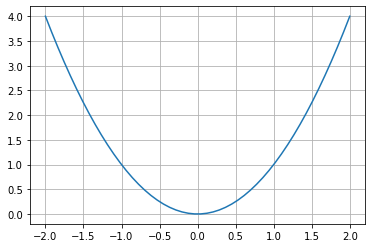

In [17]:
# Create x and y
x = np.linspace(-2, 2)
y = x**2

# Plot the function y
plt.plot(x, y)
plt.grid(True)

In [18]:
def compute_gradient(x0):
    # Define x as a variable with an initial value of x0
    x = Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        # Define y using the multiply operation
        y = tf.multiply(x, x)
    # Return the gradient of y with respect to x
    return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [19]:
model = np.array([1., 0., -1.])
letter = np.matrix([[1., 0., 1.],[1., 1., 0.],[1., 0., 1.]])

# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output, )
print(prediction.numpy())

1.0


## Linear Model

In [20]:
# Load the dataset as a dataframe
housing = pd.read_csv('data/tf/house.csv')

In [21]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


In [23]:
price

array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      dtype=float32)

In [24]:
# Compute the mean absolute error (mae)
loss = keras.losses.mse(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

NameError: name 'predictions' is not defined

In [27]:
# Initialize a variable named scalar
scalar = Variable(1.0, tf.float32)

features = np.array([1., 2., 3., 4., 5.])
targets = np.array([2., 4., 6., 8., 10.])

# Define the model
def model(scalar, features = features):
    return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
    return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
    # Set the predicted values
    predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
    return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

#### Training a Linear Model

In [33]:
intercept = tf.Variable(5., tf.float32)
slope = tf.Variable(0.001, tf.float32)

# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
    # Apply minimize, pass the loss function, and supply the variables
    opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

    # Print every 10th value of the loss
    if j % 10 == 0:
        print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

3.547175
2.793745
2.6988533
2.562189
2.4747696
2.4690053
2.4035277
2.4218972
2.4632747
2.4056377


NameError: name 'plot_results' is not defined

In [ ]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

In [28]:
df = pd.read_csv('data/tf/slmnist.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,142,143,146,148,149,149,149,150,151,...,0,15,55,63,37,61,77,65,38,23
1,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
2,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
3,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185
4,1,156,160,164,168,172,175,178,180,182,...,108,107,106,110,111,108,108,102,84,70


In [29]:
df.shape

(2000, 785)

In [38]:
y = df.iloc[:,0].values
X = df.iloc[:, 1:].values/255

In [30]:
from tensorflow import keras

# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))


# Define the output layer
model.add(keras.layers.Dense(4, 'softmax'))

# Print the model architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='sigmoid', input_shape=[784,]))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4, 'softmax'))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                12560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 68        
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________
None


In some cases, the sequential API will not be sufficiently flexible to accommodate our desired model architecture and we will need to use the functional API instead.

In [33]:
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

NameError: name 'm1_inputs' is not defined

In [39]:
# Define a sequential model
model = keras.Sequential()

# Define a hidden layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Compile the model
model.compile('SGD', loss='categorical_crossentropy')

# Complete the fitting operation
model.fit(X, y, epochs=5)

ValueError: You are passing a target array of shape (2000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.